#                       Real Estate Price Estimation: A Machine Learning Approach

______________________________________________________________________________________________________________

<img src="Predicting_House_Price.png" alt="Predicting House Price" width="1000">


Name              : Benz Babu

Organization      : Entri Elevate

Date              : 25th Sept 2024

### Overview
The House Price Prediction Model project aims to harness the power of machine learning to accurately forecast real estate prices. By analyzing a comprehensive dataset that includes various features such as location, size, number of rooms, and other relevant factors, this project seeks to develop a predictive model that can provide valuable insights for potential homebuyers, real estate agents, and investors.

The project will involve several key stages, including data collection, preprocessing, exploratory data analysis (EDA), model selection, training, evaluation, and deployment. Various machine learning algorithms will be explored and compared to identify the most effective approach for predicting house prices. The final model will be evaluated based on performance metrics such as MSE, RMSE, MAE, and R² to ensure high accuracy and reliability.

In addition to building the predictive model, the project will also focus on the practical application of the model and strategies for deployment. The ultimate goal is to create a user-friendly tool that can assist stakeholders in making informed decisions in the real estate market.

### Objective
The primary objective of this project is to develop a robust and accurate machine learning model capable of predicting house prices based on various features such as location, size and other relevant factors. This model aims to provide valuable insights for potential homebuyers, real estate agents, and investors by leveraging data-driven techniques to forecast property values. Additionally, the project seeks to explore and compare different machine learning algorithms to identify the most effective approach for house price prediction, ensuring high accuracy and reliability in the predictions.

### Data Description

Source : https://data.world/dataquest/nyc-property-sales-data

Here's a detailed description of the features used in this price prediction project:

1. **Borough**:
   - **Description**: The borough where the property is located.

2. **Neighborhood**:
   - **Description**: The specific neighborhood within the borough.

3. **Building Class Category**:
   - **Description**: The category of the building class (e.g., residential, commercial).

4. **Tax Class at Present**:
   - **Description**: The current tax classification of the property.

5. **Block**:
   - **Description**: The block number where the property is located.

6. **Lot**:
   - **Description**: The lot number within the block.

7. **Building Class at Present**:
   - **Description**: The current building class designation.

8. **Address**:
   - **Description**: The address of the property.

9. **Residential Units**:
   - **Description**: The number of residential units in the property.

10. **Commercial Units**:
    - **Description**: The number of commercial units in the property.

11. **Total Units**:
    - **Description**: The total number of units (residential + commercial) in the property.

12. **Year Built**:
    - **Description**: The year the property was built.

13. **Gross Square Feet**:
    - **Description**: The total gross square footage of the property.

14. **Land Square Feet**:
    - **Description**: The total land square footage of the property.

15. **Sale Price**:
    - **Description**: The sale price of the property.

These features provide a comprehensive view of the properties, allowing the model to learn and predict the sale prices effectively.

### Importing Libraries

Importing necessory libraries from numpy, pandas and sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


### Loading the Dataset

Loading the dataset downloaded from data.world

In [2]:

# Load the dataset
df = pd.read_csv("NYC_property_sales.csv")

### Data inspection

Data exploration , cleaning and Transformation of data 

In [3]:
df.head()  # display first five rows of the dataset

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,Bronx,Bathgate,01 One Family Dwellings,1,3030,62,A1,4463 Park Avenue,1,0,1,1578,1470,1899,1,A1,455000,28-11-2018
1,Bronx,Bathgate,01 One Family Dwellings,1,3030,70,A1,4445 Park Avenue,1,0,1,1694,1497,1899,1,A1,388500,23-07-2019
2,Bronx,Bathgate,01 One Family Dwellings,1,3039,63,A1,469 E 185th St,1,0,1,1650,1296,1910,1,A1,419000,20-12-2018
3,Bronx,Bathgate,01 One Family Dwellings,1,3043,55,A1,1948 Bathgate Avenue,1,0,1,2356,2047,1901,1,A1,470000,08-03-2019
4,Bronx,Bathgate,01 One Family Dwellings,1,3046,35,A1,2083 Bathgate Avenue,1,0,1,2050,1560,1899,1,A1,445000,17-12-2018


In [4]:
df.tail()  # display last five rows of the dataset

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
38172,Staten Island,Woodrow,02 Two Family Dwellings,1,7349,35,B9,33 Quail Lane,2,0,2,2255,2377,1998,1,B9,640000,08-03-2019
38173,Staten Island,Woodrow,02 Two Family Dwellings,1,7351,22,B2,22 Herrick Avenue,2,0,2,4000,2400,2000,1,B2,917000,01-03-2019
38174,Staten Island,Woodrow,02 Two Family Dwellings,1,7355,68,B9,62 Ambassador La,2,0,2,2340,2160,2001,1,B9,610000,06-08-2019
38175,Staten Island,Woodrow,02 Two Family Dwellings,1,7355,85,B9,104 Ambassador Lane,2,0,2,2730,2565,2001,1,B9,625000,30-07-2019
38176,Staten Island,Woodrow,02 Two Family Dwellings,1,7355,95,B9,115 Ambassador Lane,2,0,2,8846,1710,2001,1,B9,637500,20-08-2019


In [5]:
df.info()  # gives a basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38177 entries, 0 to 38176
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   borough                         38177 non-null  object
 1   neighborhood                    38177 non-null  object
 2   building_class_category         38177 non-null  object
 3   tax_class_at_present            38177 non-null  object
 4   block                           38177 non-null  int64 
 5   lot                             38177 non-null  int64 
 6   building_class_at_present       38177 non-null  object
 7   address                         38177 non-null  object
 8   residential_units               38177 non-null  int64 
 9   commercial_units                38177 non-null  int64 
 10  total_units                     38177 non-null  int64 
 11  land_square_feet                38177 non-null  int64 
 12  gross_square_feet               38177 non-null

In [6]:
df.describe().T   # gives the statistical analysis of numerical columns

,count,mean,std,min,25%,50%,75%,max
block,38177.0,4.675074e+03,3.823556e+03,1.0,1414.0,3916.0,6823.0,1.632300e+04
lot,38177.0,4.647547e+02,7.060721e+02,1.0,27.0,61.0,1032.0,9.109000e+03
residential_units,38177.0,1.835032e+00,1.188106e+01,0.0,0.0,1.0,2.0,1.327000e+03
commercial_units,38177.0,2.196872e-01,4.519257e+00,0.0,0.0,0.0,0.0,5.700000e+02
total_units,38177.0,2.054719e+00,1.283126e+01,0.0,0.0,1.0,2.0,1.348000e+03
land_square_feet,38177.0,2.637900e+03,1.179990e+04,0.0,0.0,2000.0,3000.0,1.217249e+06
gross_square_feet,38177.0,3.543144e+03,2.250052e+04,1.0,1083.0,1552.0,2334.0,1.741458e+06
year_built,38177.0,1.821801e+03,4.910531e+02,0.0,1920.0,1940.0,1986.0,2.020000e+03
tax_class_at_time_of_sale,38177.0,1.514577e+00,8.136600e-01,1.0,1.0,1.0,2.0,4.000000e+00
sale_price,38177.0,2.431342e+06,1.863026e+07,10040.0,525000.0,760000.0,1280000.0,2.155000e+09


In [7]:
df.describe(include='object').T    # gives the analysis of categorical columns

,count,unique,top,freq
borough,38177,5,Queens,11955
neighborhood,38177,253,Flushing-North,1110
building_class_category,38177,37,01 One Family Dwellings,11755
tax_class_at_present,38177,8,1,22711
building_class_at_present,38177,137,R4,8138
address,38177,36943,1502 West 1st Street,30
building_class_at_time_of_sale,38177,137,R4,8096
sale_date,38177,318,28-06-2019,359


In [8]:
df.duplicated().sum()  # to identify how much duplicates values are present 

0

In [9]:
df.isnull().sum()   # to identify how much null values are present in each columns

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
dtype: int64

### Feature Engineering

Feature engineering, a preprocessing step that involves creating new features or modifying existing features to improve model performance

In [10]:
df['age'] = 2024 - df['year_built']
df.drop(columns=['year_built'], inplace=True)

In [11]:
# Convert the 'date' column to datetime
df['sale_date_time'] = pd.to_datetime(df['sale_date'])
# Extract the year
df['sale_year'] = df['sale_date_time'].dt.year

In [12]:
df['age_after_sale'] = 2024 - df['sale_year']
df.drop(columns=['sale_date'], inplace=True)
df.drop(columns=['sale_year'], inplace=True)
df.drop(columns=['sale_date_time'], inplace=True)

In [13]:
df.drop(columns =['address','tax_class_at_present','residential_units','total_units','building_class_at_time_of_sale','neighborhood',
                  'commercial_units','tax_class_at_time_of_sale','building_class_at_present'], axis=1, inplace=True)

In [14]:
df.shape   # to find the shape of the dataset

(38177, 9)

In [15]:
df.columns     # to display the column names of the dataset

Index(['borough', 'building_class_category', 'block', 'lot',
       'land_square_feet', 'gross_square_feet', 'sale_price', 'age',
       'age_after_sale'],
      dtype='object')

### Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step that helps you understand the main characteristics of your dataset, uncover patterns, and identify relationships between variables.

<Figure size 1500x700 with 0 Axes>

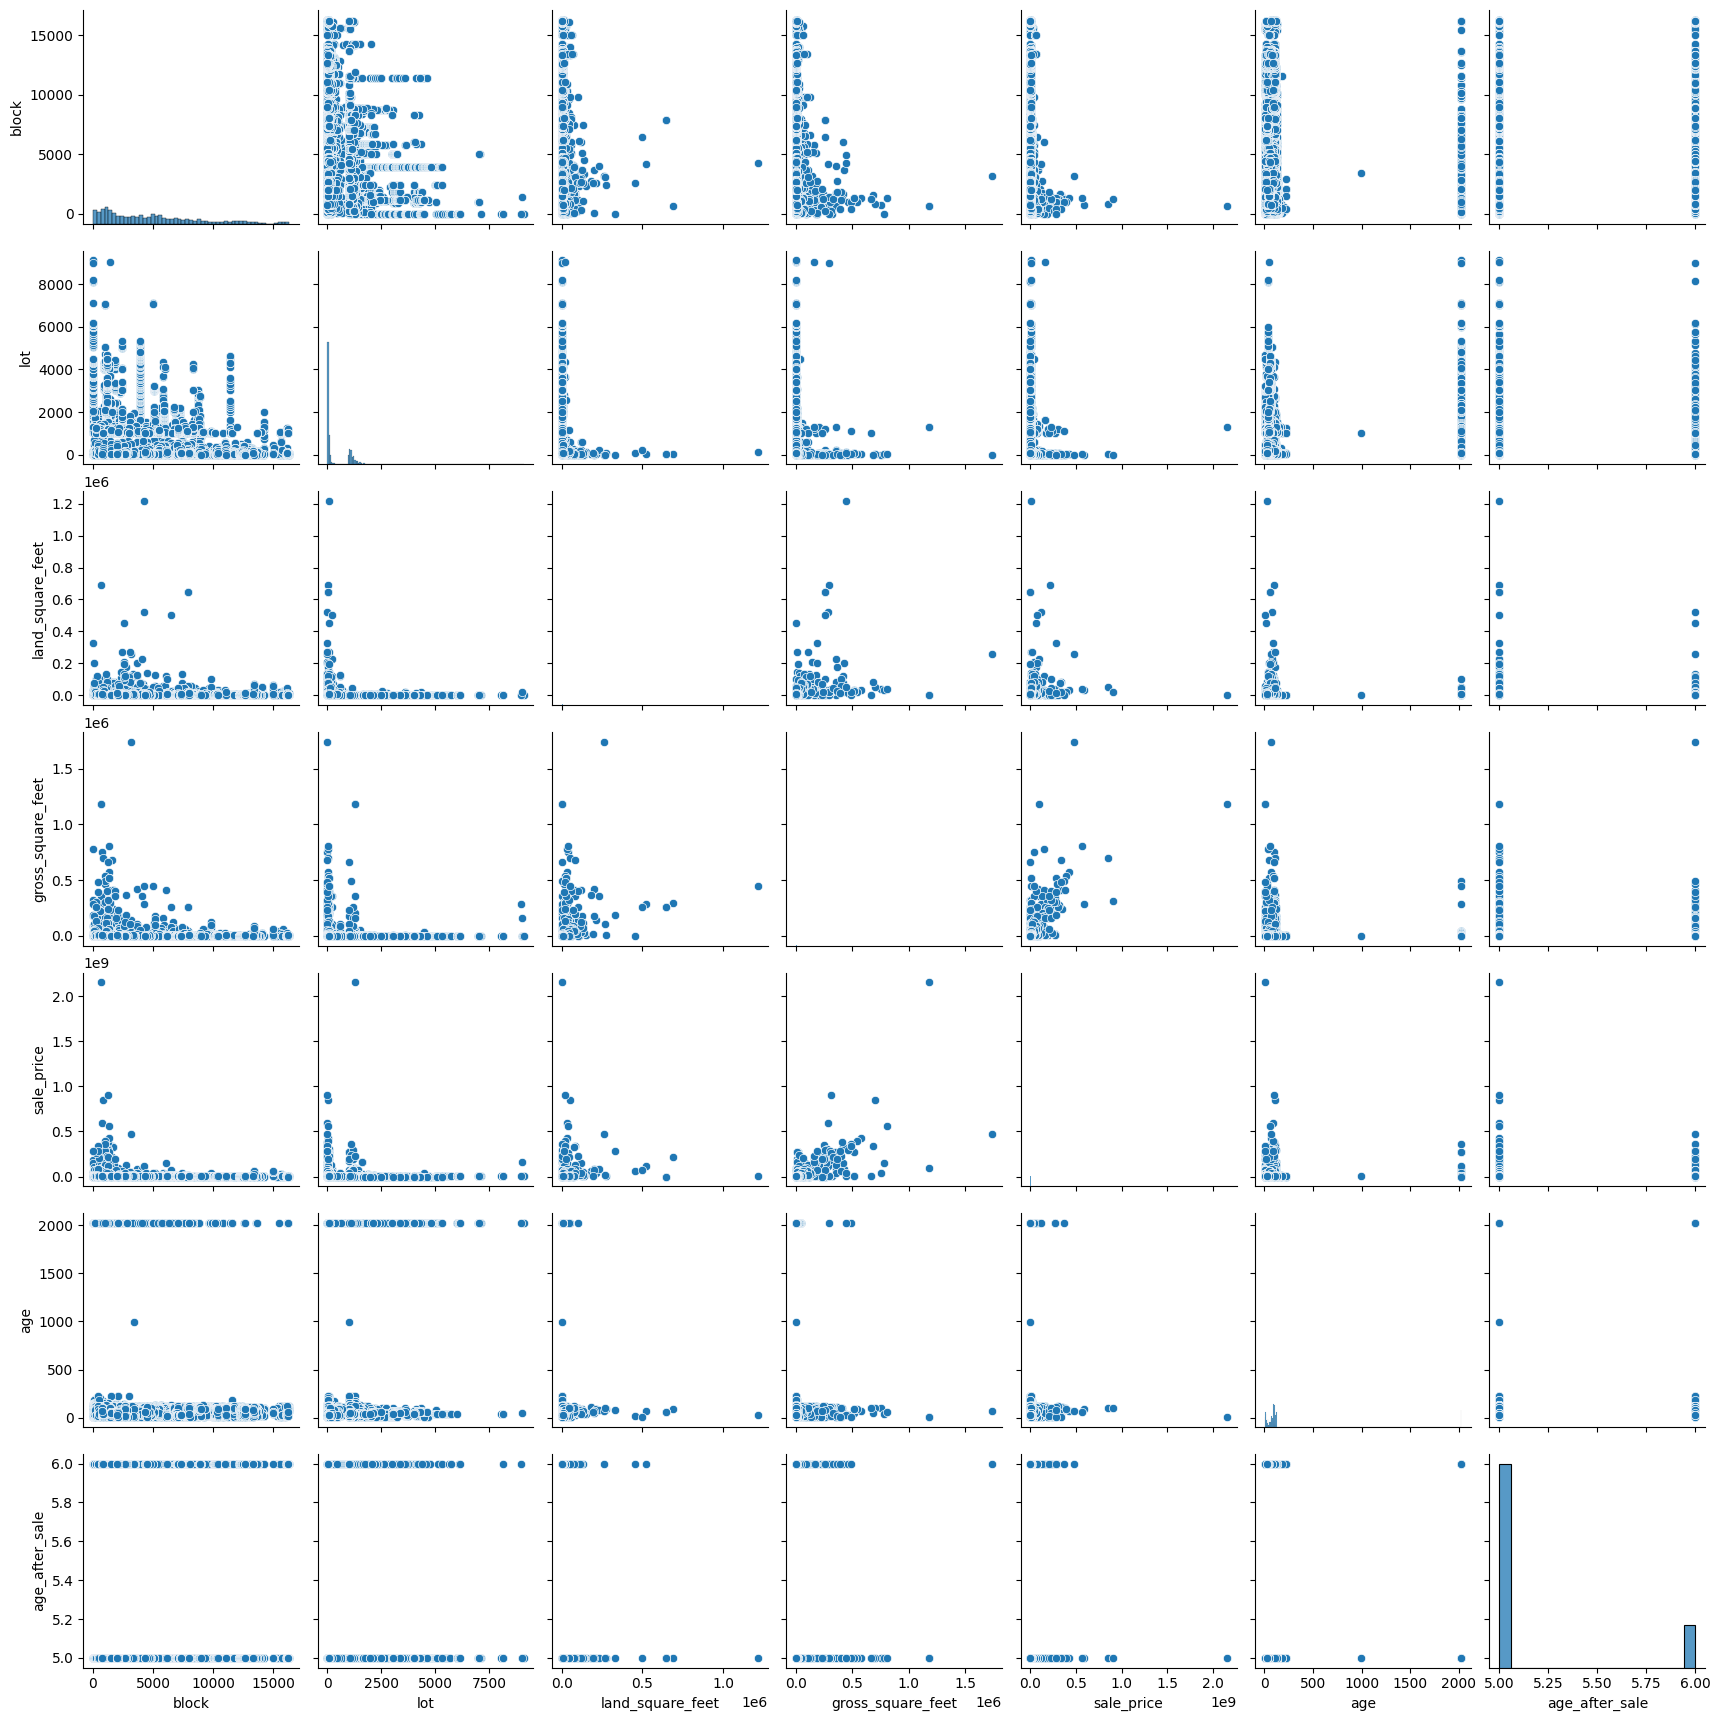

In [16]:
plt.figure(figsize=(15,7))
sns.pairplot(df)
plt.show()

Linear Relationships:  plots where the points form a straight line, indicating a strong linear relationship.
    
Non-linear Relationships: Curved patterns suggest non-linear relationships.
    
No Relationship: A random scatter of points indicates no correlation.

<Axes: xlabel='count', ylabel='borough'>

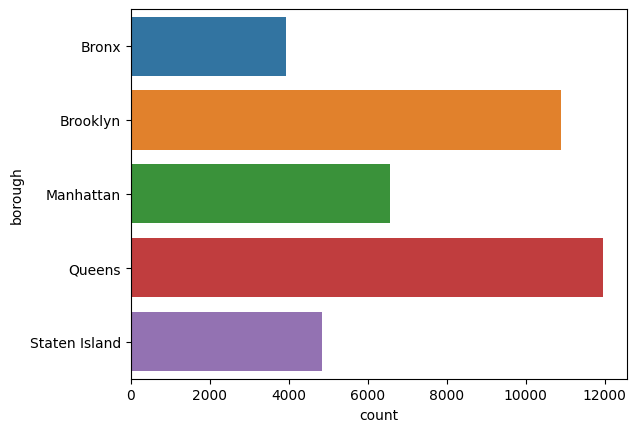

In [17]:
sns.countplot(y='borough', data=df, hue='borough', legend=False)

Here are some insights based on the chart:

Queens has the highest count, indicating it leads in the unspecified metric.

Brooklyn follows, with a slightly lower count than Queens.

Manhattan is in the middle, with a moderate count.

Staten Island has a lower count compared to the top three boroughs.

The Bronx has the lowest count among the five boroughs.

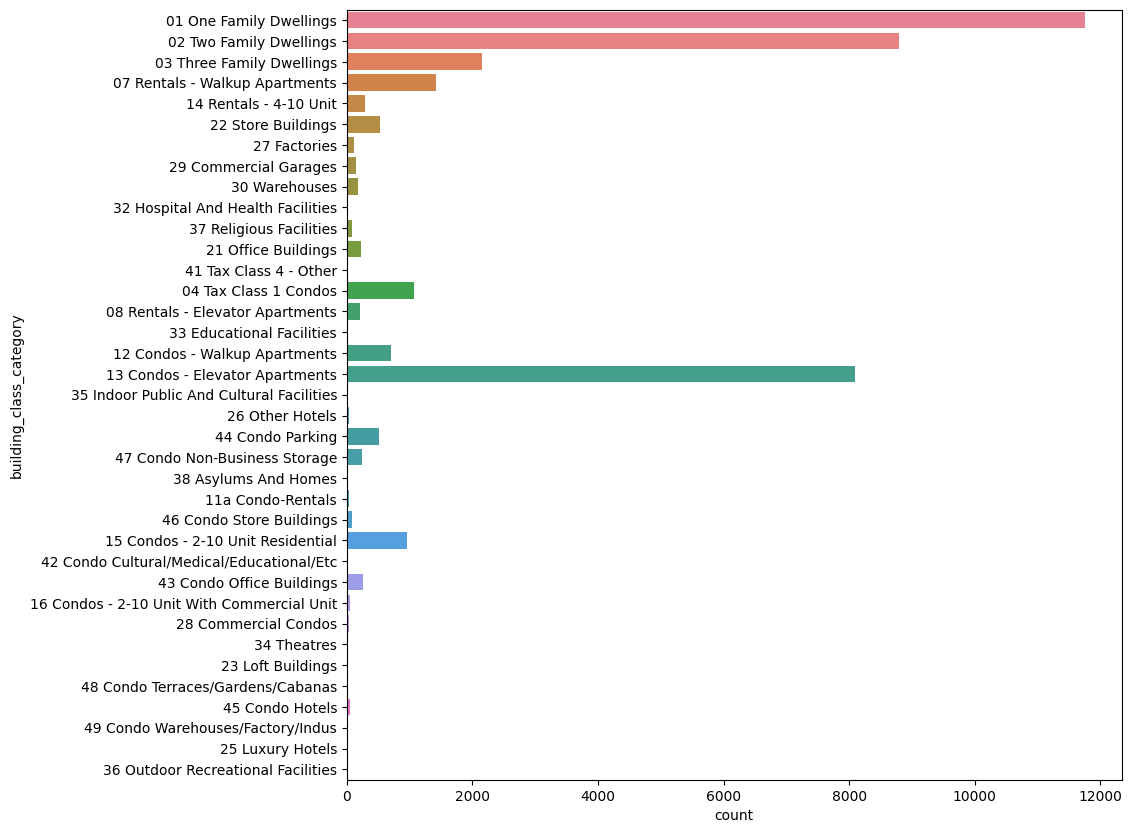

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(y='building_class_category', data=df, hue='building_class_category', legend=False)
plt.show()

 Here are some insights based on the chart:

One Family Dwellings have the highest number of sales, indicating a strong market for single-family homes.

Two Family Dwellings also show a significant number of sales, suggesting a demand for multi-family residential properties.

Walk-up Apartments and Elevator Apartments have moderate sales, reflecting the urban residential market’s activity.

Other categories like Mixed Residential & Commercial Buildings  have lower sales compared to residential properties.

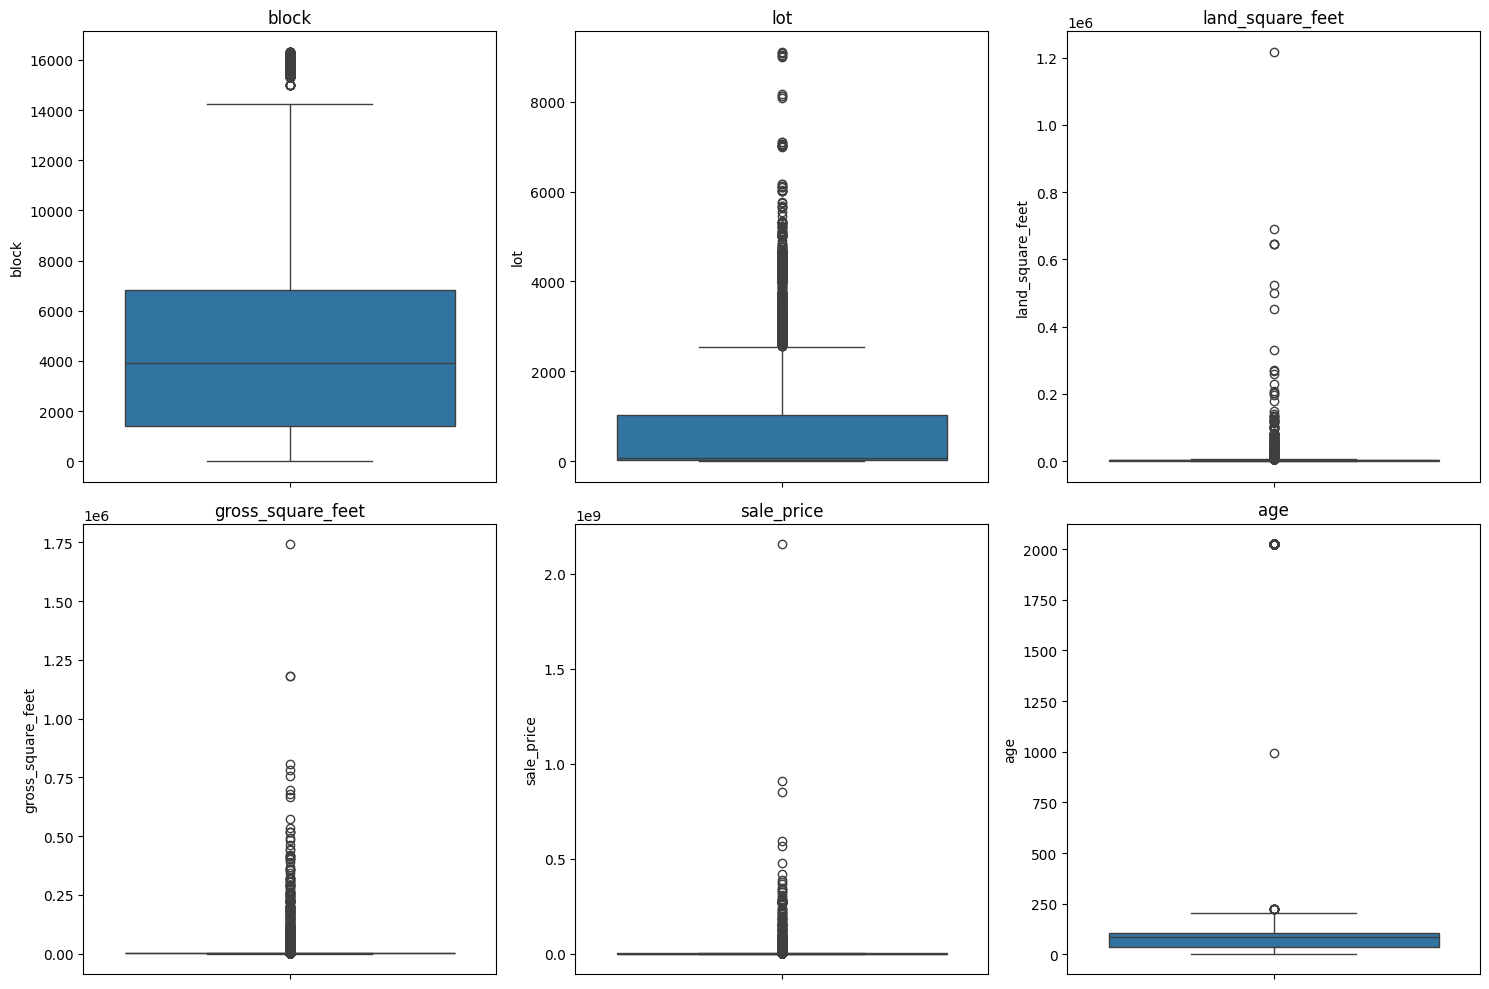

In [19]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64'])

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

As we can see there are outliers in almost all columns so using IQR method in next step, all outliers will be treated.

In [20]:

# Outlier treatment function
def treat_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return df

In [21]:

columns_to_treat = ['block', 'lot','land_square_feet','gross_square_feet','sale_price','age']
for column in columns_to_treat:
    if column in df.columns:
        df = treat_outliers(df, column)

# Display the treated DataFrame
df.head()

,borough,building_class_category,block,lot,land_square_feet,gross_square_feet,sale_price,age,age_after_sale
0,Bronx,01 One Family Dwellings,3030.0,62.0,1578.0,1470.0,455000.0,125.0,6
1,Bronx,01 One Family Dwellings,3030.0,70.0,1694.0,1497.0,388500.0,125.0,5
2,Bronx,01 One Family Dwellings,3039.0,63.0,1650.0,1296.0,419000.0,114.0,6
3,Bronx,01 One Family Dwellings,3043.0,55.0,2356.0,2047.0,470000.0,123.0,5
4,Bronx,01 One Family Dwellings,3046.0,35.0,2050.0,1560.0,445000.0,125.0,6


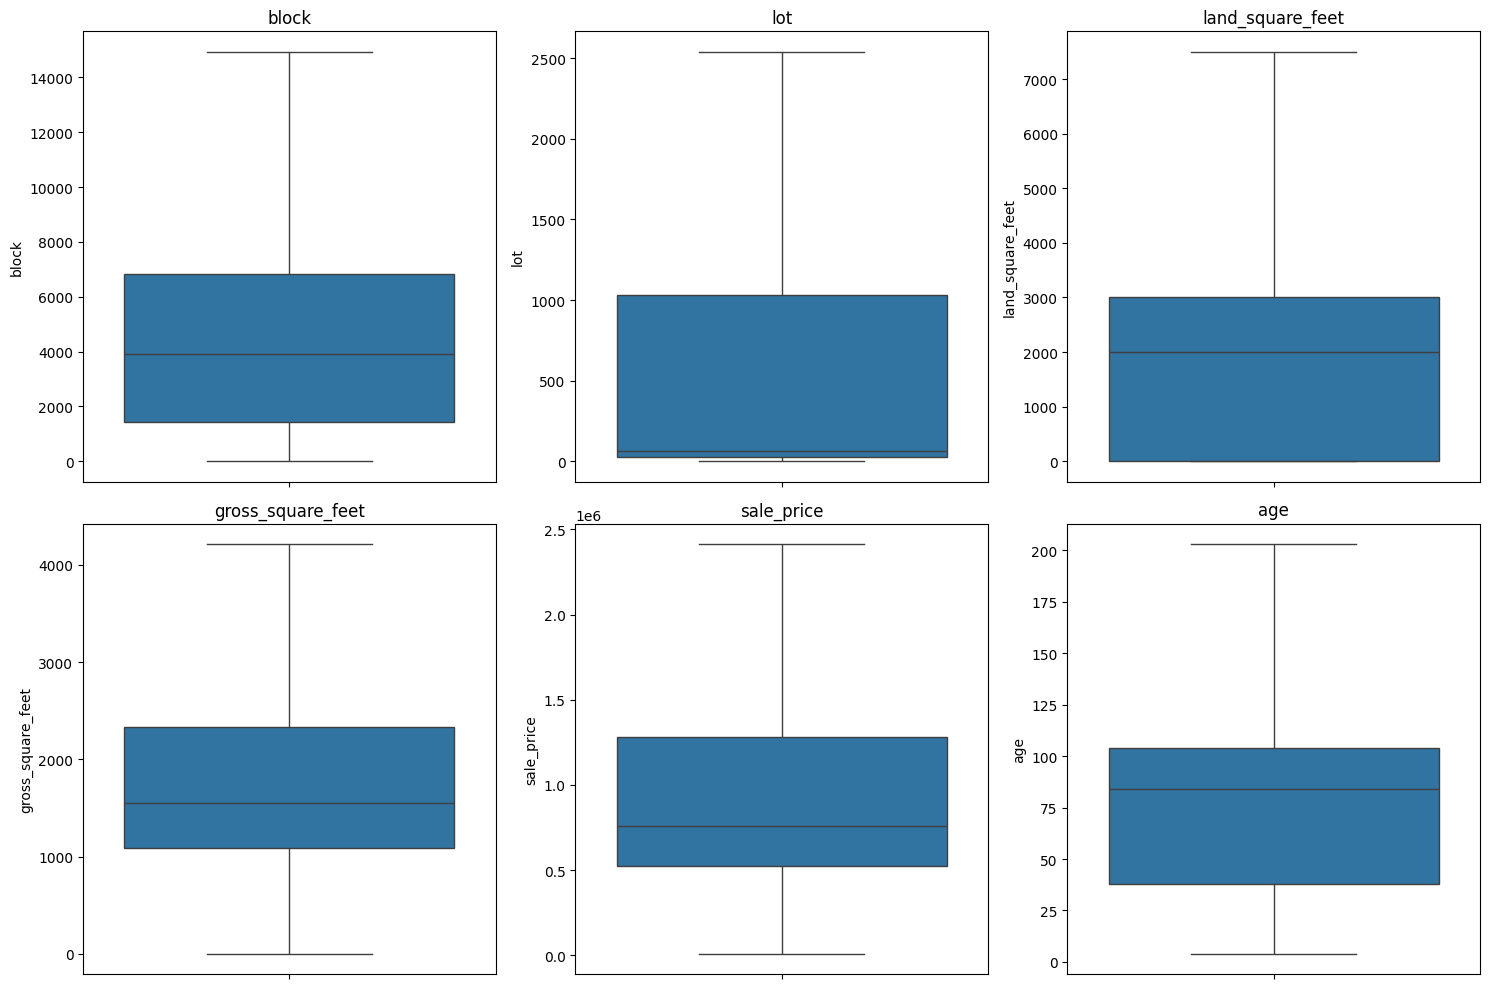

In [22]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):

    
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

All outliers have been treated.

In [23]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

correlation_matrix


,block,lot,land_square_feet,gross_square_feet,sale_price,age
block,1.000000,-0.363818,0.329568,-0.044094,-0.391086,0.001745
lot,-0.363818,1.000000,-0.684549,-0.422830,0.164406,-0.079552
land_square_feet,0.329568,-0.684549,1.000000,0.465354,-0.029406,0.046765
gross_square_feet,-0.044094,-0.422830,0.465354,1.000000,0.466243,0.069529
sale_price,-0.391086,0.164406,-0.029406,0.466243,1.000000,-0.000659
age,0.001745,-0.079552,0.046765,0.069529,-0.000659,1.000000


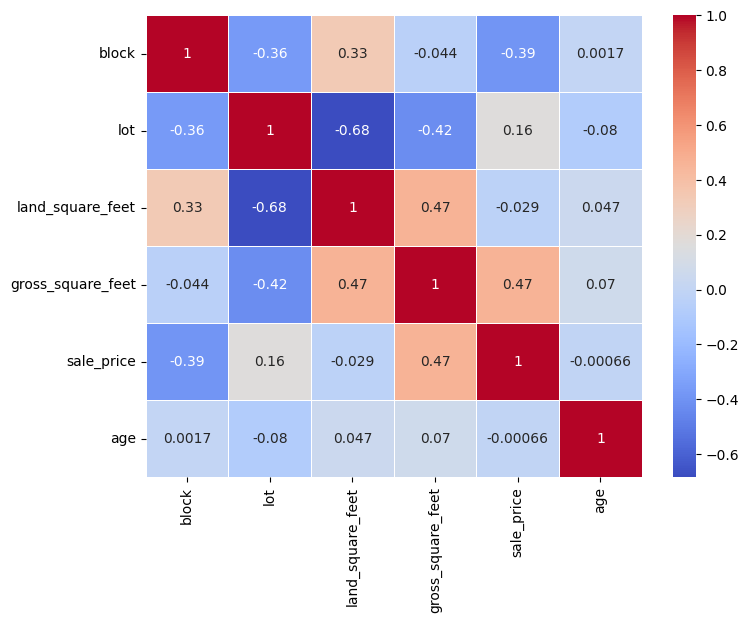

In [24]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

High Positive Correlations:

There is a moderately strong positive correlation (0.47) between gross_square_feet and land_square_feet, suggesting that properties with larger land areas tend to have larger gross square footage.

Moderate Negative Correlation:

The feature lot has a notable negative correlation with land_square_feet (-0.68), implying that as the lot value increases, the land_square_feet tends to decrease, or vice versa.

Correlation with sale_price:

sale_price has a moderate positive correlation (0.47) with gross_square_feet, indicating that properties with more gross square footage tend to have higher sale prices.
Other features, like block, lot, and age, show weak correlations with sale_price, indicating that they might have a limited impact on the property price.

Low Correlation Among Other Features:

Most other feature pairs show very low correlations, suggesting that they are relatively independent of each other.

### Feature Engineering

Feature engineering for encoding is crucial for preparing your data for machine learning models, especially when dealing with categorical variables.

In [25]:
from sklearn.preprocessing import OneHotEncoder

nom_cols = ['borough', 'building_class_category']

# Initialize the OneHotEncoder
one_hot_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoded_data = one_hot_enc.fit_transform(df[nom_cols])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_enc.get_feature_names_out(nom_cols))

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df = df.drop(columns=nom_cols, axis=1)

# Display the DataFrame
df.head()


,block,lot,land_square_feet,gross_square_feet,sale_price,age,age_after_sale,borough_Bronx,borough_Brooklyn,borough_Manhattan,...,building_class_category_38 Asylums And Homes,building_class_category_41 Tax Class 4 - Other,building_class_category_42 Condo Cultural/Medical/Educational/Etc,building_class_category_43 Condo Office Buildings,building_class_category_44 Condo Parking,building_class_category_45 Condo Hotels,building_class_category_46 Condo Store Buildings,building_class_category_47 Condo Non-Business Storage,building_class_category_48 Condo Terraces/Gardens/Cabanas,building_class_category_49 Condo Warehouses/Factory/Indus
0,3030.0,62.0,1578.0,1470.0,455000.0,125.0,6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3030.0,70.0,1694.0,1497.0,388500.0,125.0,5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3039.0,63.0,1650.0,1296.0,419000.0,114.0,6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3043.0,55.0,2356.0,2047.0,470000.0,123.0,5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3046.0,35.0,2050.0,1560.0,445000.0,125.0,6,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Split the data into features (x) and target (y)
x = df.drop('sale_price', axis=1)
y = df['sale_price']

### Feature Selection

Feature selection is the process of selecting relevant features to build a predictive
model.

In [27]:
# from sklearn.feature_selection import RFE  (Recursive Feature Elimination) 

model = RandomForestRegressor()                            
rfe = RFE(estimator=model, n_features_to_select=5)
x_rfe = rfe.fit_transform(x, y)                            

# Get the selected features
selected_features = x.columns[rfe.support_]                                                         # to find which features supports most
print("Selected Features:", selected_features)

# Get the ranking of features
feature_ranking = rfe.ranking_                                                                      # to find the rankings of the features
print("Feature Ranking:", feature_ranking)

# Get the importance scores of features
model.fit(x, y)
feature_importances = model.feature_importances_                                                    # to find which features are important by score
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importance_df)

Selected Features: Index(['block', 'lot', 'gross_square_feet', 'age', 'borough_Manhattan'], dtype='object')
Feature Ranking: [ 1  1  2  1  1  5  6  3  1  4  8 11 10 14 28 13 30 35 21  9 23 20 31 19
  7 43 44 33 17 38 16 27 32 41 42 34 37 29 36 22 26 15 24 12 18 25 39 40]
Feature Importances:
                                               Feature  Importance
3                                   gross_square_feet    0.363981
8                                   borough_Manhattan    0.231834
0                                               block    0.164076
1                                                 lot    0.049504
7                                    borough_Brooklyn    0.043136
4                                                 age    0.043013
2                                    land_square_feet    0.040468
9                                      borough_Queens    0.013336
5                                      age_after_sale    0.006105
24         building_class_category_22 Store Bu

In [28]:
# Train-Test Split            
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Feature Scaling

Feature Scaling is the process to ensure all the variables are in same scale

In [29]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Model Implementation

In [30]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGBoost Regressor': xgb.XGBRegressor()
}

### Model Evaluation

In [36]:
# Train and test models
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Store results
    results[model_name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
        }

# Display the evaluation results
results_df = pd.DataFrame(results).T
results_df

,R2 Score,MSE
Linear Regression,0.600527,1.836871e+11
Decision Tree Regressor,0.625179,1.723512e+11
Random Forest Regressor,0.790135,9.650082e+10
Gradient Boosting Regressor,0.711541,1.326403e+11
XGBoost Regressor,0.783376,9.960883e+10


### Hyperparameter Tuning

Hyperparameter is the process in machine learning to improve the accuracy and performance of the model

In [32]:
rf = RandomForestRegressor()
 
param_grid = {
    'n_estimators': [10, 20, 30],     # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]        # Whether to use bootstrap samples
}
 
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
 
# Fit the model
grid_search.fit(x_train, y_train)

# Finding the best parameters
print("The Best parameters is : ", grid_search.best_params_)

# Best rf after giving the best parameters
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
The Best parameters is :  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}


### Model Evaluation after Hyperparameter Tuning

In [33]:
# Train and test models
results_after = {}
for model_name, model in models.items():
    if model_name == 'Random Forest Regressor':
        model = best_rf
    else:
        model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Store results
    results_after[model_name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
    }

In [34]:
# Display the evaluation results
results_after_df = pd.DataFrame(results_after).T
results_after_df

,R2 Score,MSE
Linear Regression,0.600527,1.836871e+11
Decision Tree Regressor,0.630413,1.699446e+11
Random Forest Regressor,0.784591,9.905009e+10
Gradient Boosting Regressor,0.711552,1.326349e+11
XGBoost Regressor,0.783376,9.960883e+10


### Identifying the Best Model for the Dataset

In [35]:
# Identify the best performing model
best_model_name = results_after_df['R2 Score'].idxmax()
print(f"The best performing model is: {best_model_name}")

The best performing model is: Random Forest Regressor


# Pipeline Implementation

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

class RealEstatePricePipeline:
    def __init__(self):
        self.numerical_features = ['block', 'lot', 'land_square_feet', 
                                   'gross_square_feet', 'age', 'age_after_sale']
        self.categorical_features = ['borough', 'building_class_category']
        self.target = 'sale_price'
        self.model = None
        self.preprocessor = None
        
    def treat_outliers(self, df, column_name):
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        return df
    
    def preprocess_data(self, df):
        df['age'] = 2024 - df['year_built']
        df['sale_date_time'] = pd.to_datetime(df['sale_date'])
        df['sale_year'] = df['sale_date_time'].dt.year
        df['age_after_sale'] = 2024 - df['sale_year']
        
        # Drop unnecessary columns
        columns_to_drop = ['year_built', 'sale_date', 'sale_year', 'sale_date_time',
                           'address', 'tax_class_at_present', 'residential_units',
                           'total_units', 'building_class_at_time_of_sale',
                           'neighborhood', 'commercial_units',
                           'tax_class_at_time_of_sale', 'building_class_at_present']
        df.drop(columns=columns_to_drop, inplace=True)

        # Outlier treatment for specific columns
        columns_to_treat = ['block', 'lot', 'land_square_feet', 'gross_square_feet', 'sale_price', 'age']
        for column in columns_to_treat:
            if column in df.columns:
                df = self.treat_outliers(df, column)

        return df
    
    def prepare_data(self, df):
        # Create a copy of the dataframe and preprocess it
        data = self.preprocess_data(df)
        
        # Split features and target
        X = data.drop(self.target, axis=1)
        y = data[self.target]
        
        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.2, 
                                                            random_state=42)
        return X_train, X_test, y_train, y_test
    
    def create_preprocessor(self):
        # Numerical preprocessing
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])
        
        # Categorical preprocessing
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('one_hot_encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ])
        
        # Combine preprocessors
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, self.numerical_features),
                ('cat', categorical_transformer, self.categorical_features)
            ])
        
    def create_pipeline(self):
        # Create the full pipeline
        self.model = Pipeline([
            ('preprocessor', self.preprocessor),
            ('regressor', RandomForestRegressor(
                n_estimators=100,
                random_state=42
            ))
        ])
        
    def train_model(self, X_train, y_train):
        # Fit the pipeline
        self.model.fit(X_train, y_train)
        
    def evaluate_model(self, X_test, y_test):
        # Make predictions
        y_pred = self.model.predict(X_test)
        
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        
        # Print metrics
        print(f"R² Score: {r2:.4f}")

        return r2
    
    def predict(self, X):
        return self.model.predict(X)
    
    def run_pipeline(self, df):
        # Prepare data
        X_train, X_test, y_train, y_test = self.prepare_data(df)
        
        # Create and set up pipeline
        self.create_preprocessor()
        self.create_pipeline()
        
        # Train model
        self.train_model(X_train, y_train)
        
        # Evaluate model
        metrics = self.evaluate_model(X_test, y_test)
        
        return metrics, self.model

if __name__ == "__main__":
    # Load data
    df = pd.read_csv("NYC_property_sales.csv")
    
    # Initialize and run pipeline
    pipeline = RealEstatePricePipeline()
    metrics, trained_model = pipeline.run_pipeline(df)


R² Score: 0.7899


### Predictions of Unseen Data using Pipeline

In [49]:
import pandas as pd

def predict_unseen_data(unseen_data_path, pipeline):
    # Load unseen data
    unseen_df = pd.read_csv(unseen_data_path)
    
    # Preprocess the unseen data using the existing preprocess_data function
    processed_unseen_df = pipeline.preprocess_data(unseen_df)
    
    # Make predictions using the trained pipeline model
    predictions = pipeline.predict(processed_unseen_df)
    
    # Return predictions
    return predictions

# Path to the unseen data CSV
unseen_data_path = "Unseen Data.csv"

# Initialize and train the pipeline on the existing data
pipeline = RealEstatePricePipeline()
df = pd.read_csv("NYC_property_sales.csv")
pipeline.run_pipeline(df)

# Predict on unseen data
predictions = predict_unseen_data(unseen_data_path, pipeline)

# Print predictions
print("Predicted Sale Prices for Unseen Data:", predictions)


R² Score: 0.7899
Predicted Sale Prices for Unseen Data: [ 513997.69333333  649941.35        571186.91        436230.94666667
  608313.15        595485.82        614242.7         508749.52
  821922.15       2057385.59       2107247.9        1947803.5
  963678.33        883969.97        932085.          799710.
  469094.1         308786.81333333  300691.52        846904.85857143]


### Conclusion

The project effectively demonstrates the end-to-end process of building a machine learning model for real estate price prediction. The use of multiple models and thorough evaluation ensures that the best possible model is selected. The hyperparameter tuning further enhances the model’s performance, making it robust and reliable for real-world applications.

### Future Work

To further improve the model and its predictions, consider the following steps:

Feature Engineering:

Explore additional features that could impact real estate prices, such as proximity to amenities, crime rates, school ratings, and economic indicators.
Create interaction features or polynomial features to capture non-linear relationships.

Advanced Models:

Experiment with more advanced models like LightGBM, CatBoost, or neural networks.
Use ensemble methods to combine predictions from multiple models for better accuracy.

Data Augmentation:

Increase the dataset size by incorporating data from different time periods or additional sources.

Cross-Validation:

Use k-fold cross-validation to ensure the model’s robustness and generalizability.
Perform time-series cross-validation if the data has a temporal component.

Regular Updates:

Regularly update the model with new data to maintain its accuracy and relevance.
Monitor the model’s performance over time and retrain it as necessary.
